In [ ]:
# mount my drive to fetch data.
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

In [ ]:
# Load Libraries
import sys
import numpy as np
import pandas as pd
import pickle
import tensorflow as tf
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.layers import LSTM, Embedding
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
from tensorflow.keras.layers import Conv1D, GlobalMaxPooling1D, MaxPooling1D
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from tensorflow.keras.utils import to_categorical
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report
import seaborn as sns


In [ ]:
# Import the pandas library
import pandas as pd

# Load the training data from the CSV file
train_df = pd.read_csv('/content/drive/MyDrive/RICE-DATASET.CSV')

# Drop rows with missing values (NaN)
train_df = train_df.dropna()

# Display the loaded and processed DataFrame
train_df.head()


,Soil Moisture,Temperature,Humidity,Time,Status
0,54,22,70,21,ON
1,12,20,40,104,OFF
2,34,26,35,62,ON
3,7,44,44,93,OFF
4,50,38,23,92,OFF


In [ ]:

# Load training data
train_df = pd.read_csv('/content/drive/MyDrive/RICE-DATASET.CSV')
train_df = train_df.dropna()

# Convert output column
label = {'ON': 0, 'OFF': 1}
train_df['Label'] = [label[item] for item in train_df['Status']]

# Define target variable 'y' and feature variables 'x'
y = train_df['Label']
x = train_df[['Soil Moisture', 'Temperature', 'Humidity', 'Time']]


In [ ]:
# Load training data
train_df = pd.read_csv('/content/drive/MyDrive/RICE-DATASET.CSV')
train_df = train_df.dropna()

# Convert output column
label = {'ON': 0, 'OFF': 1}
train_df['Label'] = [label[item] for item in train_df['Status']]

# Define target variable 'y' and feature variables 'x'
y = train_df['Label']
x = train_df[['Soil Moisture', 'Temperature', 'Humidity', 'Time']]

In [ ]:
unique_values = y.unique()
print(unique_values)


[0 1]


In [ ]:
# Split dataset into testing and training
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define the model
model = Sequential()
model.add(Dense(480, input_dim=4, activation='relu'))
model.add(Dense(240, activation='relu'))
model.add(Dense(120, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Use 'sigmoid' for binary classification

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Display model summary
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 480)               2400      
                                                                 
 dense_1 (Dense)             (None, 240)               115440    
                                                                 
 dense_2 (Dense)             (None, 120)               28920     
                                                                 
 dense_3 (Dense)             (None, 1)                 121       
                                                                 
Total params: 146881 (573.75 KB)
Trainable params: 146881 (573.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
hist = model.fit(x_train, y_train, epochs=1088, batch_size=128, validation_data=(x_test, y_test))


Epoch 1/1088
547/547 [==============================] - 6s 8ms/step - loss: 0.4564 - accuracy: 0.7824 - val_loss: 0.4041 - val_accuracy: 0.8017
Epoch 2/1088
547/547 [==============================] - 4s 7ms/step - loss: 0.3969 - accuracy: 0.8053 - val_loss: 0.3879 - val_accuracy: 0.8087
Epoch 3/1088
547/547 [==============================] - 4s 7ms/step - loss: 0.3710 - accuracy: 0.8225 - val_loss: 0.3758 - val_accuracy: 0.8264
Epoch 4/1088
547/547 [==============================] - 5s 9ms/step - loss: 0.3533 - accuracy: 0.8330 - val_loss: 0.3423 - val_accuracy: 0.8342
Epoch 5/1088
547/547 [==============================] - 4s 7ms/step - loss: 0.3153 - accuracy: 0.8548 - val_loss: 0.3228 - val_accuracy: 0.8493
Epoch 6/1088
547/547 [==============================] - 3s 6ms/step - loss: 0.2739 - accuracy: 0.8756 - val_loss: 0.2467 - val_accuracy: 0.8970
Epoch 7/1088
547/547 [==============================] - 5s 9ms/step - loss: 0.2360 - accuracy: 0.8986 - val_loss: 0.2058 - val_accuracy:

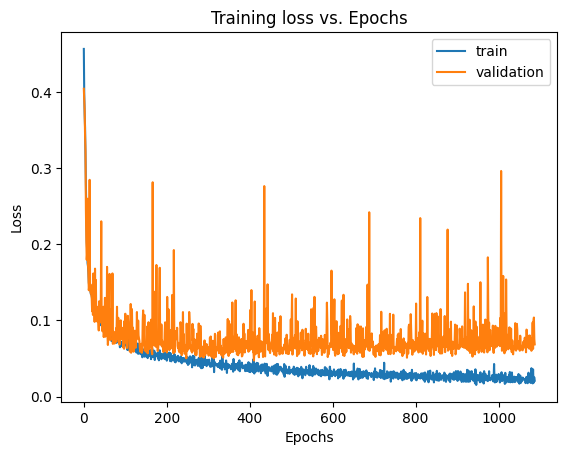

In [24]:
import matplotlib.pyplot as plt

# Plot loss
plt.plot(hist.history['loss'], label='train')
plt.plot(hist.history['val_loss'], label='validation')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training loss vs. Epochs')
plt.legend()
plt.show()


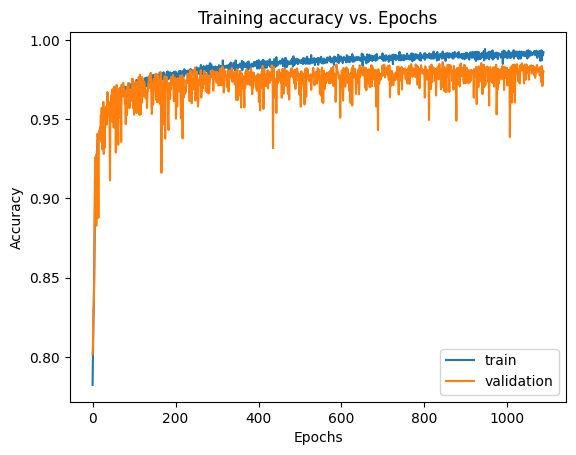

In [25]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.plot(hist.history['accuracy'], label='train')
plt.plot(hist.history['val_accuracy'], label='validation')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training accuracy vs. Epochs')
plt.legend()
plt.show()


In [26]:
evaluation = model.evaluate(x_test, y_test)


938/938 [==============================] - 6s 6ms/step - loss: 0.0686 - accuracy: 0.9800


In [27]:
preds = np.round(model.predict(x_test), 0)
labels = ['OFF', 'ON']
classification_metrics = metrics.classification_report(y_test, preds, target_names=labels)
print(classification_metrics)


938/938 [==============================] - 3s 3ms/step
              precision    recall  f1-score   support

         OFF       0.98      0.98      0.98     16015
          ON       0.98      0.98      0.98     13985

    accuracy                           0.98     30000
   macro avg       0.98      0.98      0.98     30000
weighted avg       0.98      0.98      0.98     30000



In [32]:
from sklearn.metrics import confusion_matrix

# Convert binary labels back to categorical labels
categorical_test_labels = pd.DataFrame(y_test).replace({0: 'OFF', 1: 'ON'})
categorical_preds = pd.DataFrame(preds).replace({0.0: 'OFF', 1.0: 'ON'})

# Calculate the confusion matrix
cm = confusion_matrix(categorical_test_labels, categorical_preds)

print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[15665   350]
 [  251 13734]]


In [33]:
import numpy as np
import matplotlib.pyplot as plt
import itertools

def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    Prints a pretty confusion matrix with the option to normalize.

    :param cm: Confusion matrix
    :param classes: List of class labels
    :param normalize: Whether to normalize the matrix
    :param title: Title of the plot
    :param cmap: Colormap
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.

    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Example usage:
# plot_confusion_matrix(cm, classes=['OFF', 'ON'], normalize=True)
# plt.show()


In [34]:
import numpy as np
from sklearn.metrics import classification_report

# Calculate predictions and round them to 0 or 1
preds = np.round(model.predict(x_test), 0)

# Define class labels
labels = ['OFF', 'ON']

# Generate the classification report
classification_metrics = classification_report(y_test, preds, target_names=labels)

# Print the classification report
print(classification_metrics)


938/938 [==============================] - 5s 5ms/step
              precision    recall  f1-score   support

         OFF       0.98      0.98      0.98     16015
          ON       0.98      0.98      0.98     13985

    accuracy                           0.98     30000
   macro avg       0.98      0.98      0.98     30000
weighted avg       0.98      0.98      0.98     30000



In [35]:
import numpy as np
from sklearn.metrics import classification_report

# Calculate predictions and round them to 0 or 1
preds = np.round(model.predict(x_test), 0)

# Define class labels
labels = ['OFF', 'ON']

# Generate the classification report
classification_metrics = classification_report(y_test, preds, target_names=labels)

# Print the classification report
print(classification_metrics)

938/938 [==============================] - 2s 2ms/step
              precision    recall  f1-score   support

         OFF       0.98      0.98      0.98     16015
          ON       0.98      0.98      0.98     13985

    accuracy                           0.98     30000
   macro avg       0.98      0.98      0.98     30000
weighted avg       0.98      0.98      0.98     30000



Normalized confusion matrix


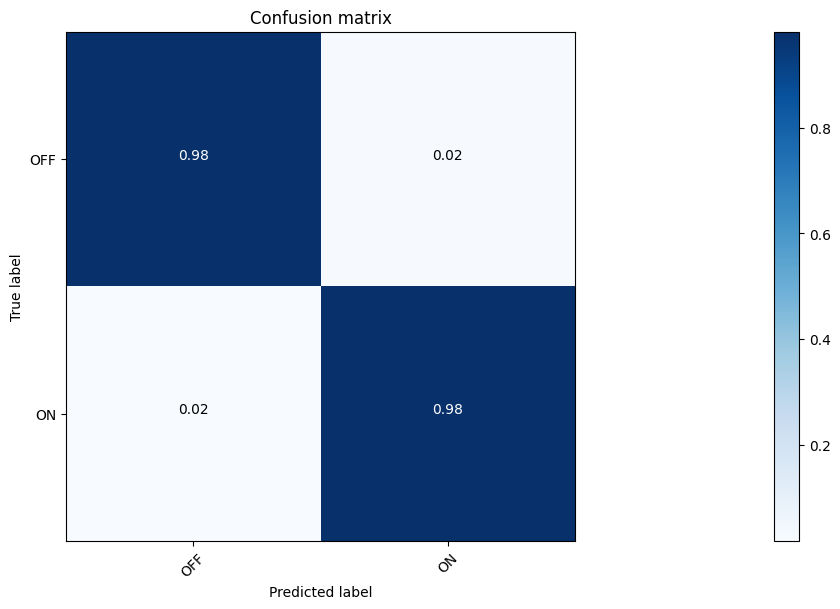

In [37]:
plt.rcParams["figure.figsize"] = (40, 6)
labels = ['OFF', 'ON']

# Assuming cm is your confusion matrix
plot_confusion_matrix(cm, labels, normalize=True)


In [39]:
from sklearn.model_selection import train_test_split

# Split dataset into testing and training
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)


In [44]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(x_train, y_train)
Y_pred = lr.predict(x_test)


In [45]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

# Results
print("***LOGISTIC REGRESSION RESULTS****")
print("Accuracy: {:.2f}%".format(accuracy_score(y_test, Y_pred) * 100))
print("F1 Score: {:.6f}".format(f1_score(y_test, Y_pred, average='macro')))
print("Precision: {:.6f}".format(precision_score(y_test, Y_pred)))
print("Recall: {:.6f}".format(recall_score(y_test, Y_pred)))


***LOGISTIC REGRESSION RESULTS****
Accuracy: 71.70%
F1 Score: 0.714830
Precision: 0.704725
Recall: 0.676153


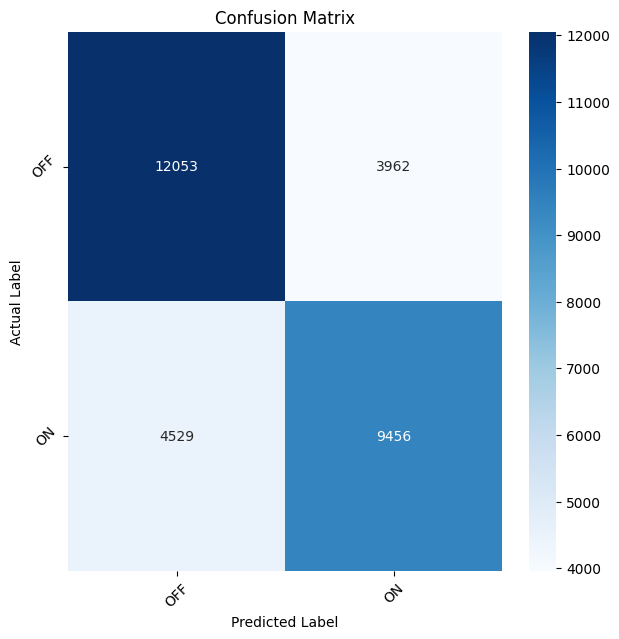

In [46]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the confusion matrix
cm = confusion_matrix(y_test, Y_pred)

# Set the figure size
plt.rcParams["figure.figsize"] = (7, 7)

# Create a subplot
ax = plt.subplot()

# Create the heatmap using Seaborn
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")

# Set the title, labels, and rotation of tick labels
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.xticks(rotation=45)
plt.yticks(rotation=45)

# Set tick labels for both x and y axes
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

# Display the heatmap
plt.show()


In [47]:
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest classifier with 100 estimators (trees)
rf = RandomForestClassifier(n_estimators=100)

# Fit the model to the training data
rf.fit(x_train, y_train)

# Make predictions on the test data
y_pred = rf.predict(x_test)


In [48]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

# Results
print("***RANDOM FOREST RESULTS***")
print("Accuracy: {:.2f}%".format(accuracy_score(y_test, y_pred) * 100))
print("F1 Score: {:.6f}".format(f1_score(y_test, y_pred, average='macro')))
print("Precision: {:.6f}".format(precision_score(y_test, y_pred)))
print("Recall: {:.6f}".format(recall_score(y_test, y_pred)))


***RANDOM FOREST RESULTS***
Accuracy: 99.98%
F1 Score: 0.999766
Precision: 1.000000
Recall: 0.999499


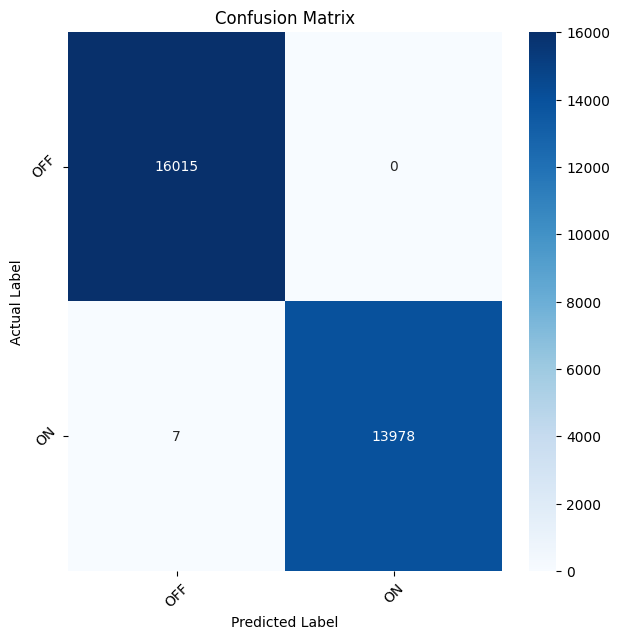

In [49]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Set the figure size
plt.rcParams["figure.figsize"] = (7, 7)

# Create a subplot
ax = plt.subplot()

# Create the heatmap using Seaborn
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")

# Set the title, labels, and rotation of tick labels
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.xticks(rotation=45)
plt.yticks(rotation=45)

# Set tick labels for both x and y axes
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

# Display the heatmap
plt.show()


In [52]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)


In [53]:
from sklearn.svm import SVC

# Create an SVM classifier with an RBF kernel
sv = SVC(kernel="rbf")

# Fit the SVM model to the training data
sv.fit(x_train, y_train)

# Make predictions on the test data
y_pred = sv.predict(x_test)


In [54]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

# Results
print("***SVM RESULTS***")
print("Accuracy: {:.2f}%".format(accuracy_score(y_test, y_pred) * 100))
print("F1 Score: {:.6f}".format(f1_score(y_test, y_pred, average='macro')))
print("Precision: {:.6f}".format(precision_score(y_test, y_pred)))
print("Recall: {:.6f}".format(recall_score(y_test, y_pred)))


***SVM RESULTS***
Accuracy: 90.04%
F1 Score: 0.899681
Precision: 0.908052
Recall: 0.874937


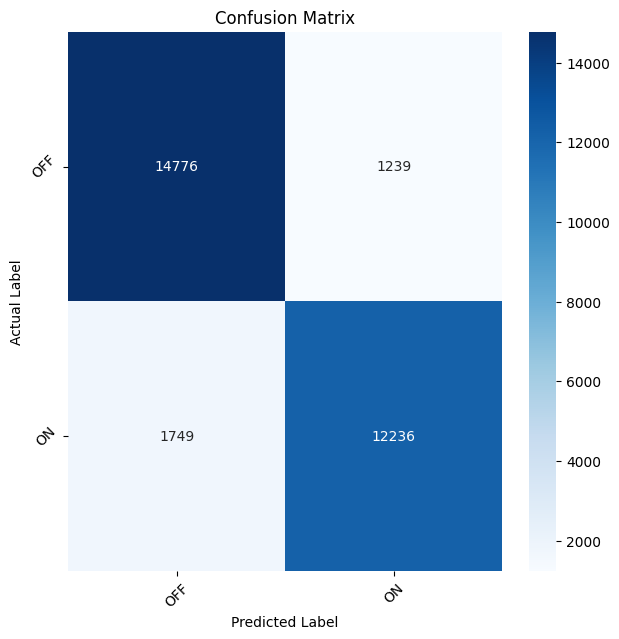

In [55]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Set the figure size
plt.rcParams["figure.figsize"] = (7, 7)

# Create a subplot
ax = plt.subplot()

# Create the heatmap using Seaborn
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")

# Set the title, labels, and rotation of tick labels
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.xticks(rotation=45)
plt.yticks(rotation=45)

# Set tick labels for both x and y axes
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

# Display the heatmap
plt.show()


In [56]:
from sklearn.neighbors import KNeighborsClassifier

# Create a KNN classifier with 3 neighbors
neigh = KNeighborsClassifier(n_neighbors=3)

# Fit the model to the training data
neigh.fit(x_train, y_train)

# Make predictions on the test data
knn_ypred = neigh.predict(x_test)

# Make probabilistic predictions (optional)
# print(neigh.predict_proba(x_test))


In [57]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

# Results
print("***K Nearest Neighbor***")
print("Accuracy: {:.2f}%".format(accuracy_score(y_test, knn_ypred) * 100))
print("F1 Score: {:.6f}".format(f1_score(y_test, knn_ypred, average='macro')))
print("Precision: {:.6f}".format(precision_score(y_test, knn_ypred)))
print("Recall: {:.6f}".format(recall_score(y_test, knn_ypred)))


***K Nearest Neighbor***
Accuracy: 94.36%
F1 Score: 0.943287
Precision: 0.945819
Recall: 0.932428


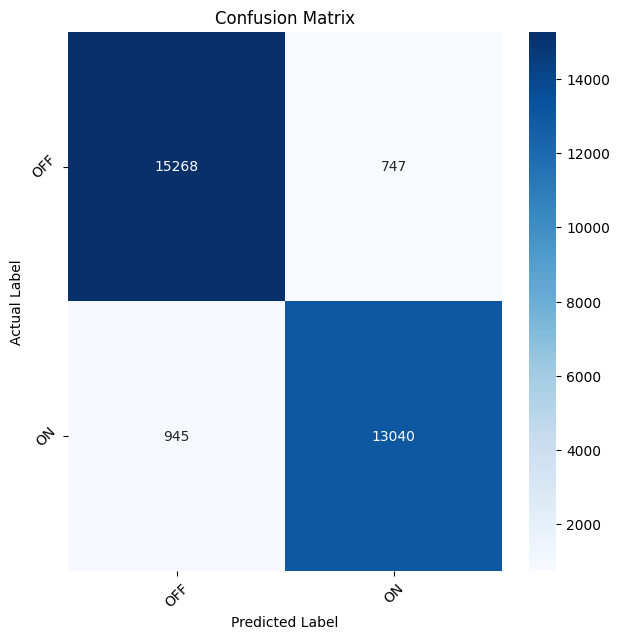

In [58]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the confusion matrix
cm = confusion_matrix(y_test, knn_ypred)

# Set the figure size
plt.rcParams["figure.figsize"] = (7, 7)

# Create a subplot
ax = plt.subplot()

# Create the heatmap using Seaborn
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")

# Set the title, labels, and rotation of tick labels
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.xticks(rotation=45)
plt.yticks(rotation=45)

# Set tick labels for both x and y axes
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

# Display the heatmap
plt.show()


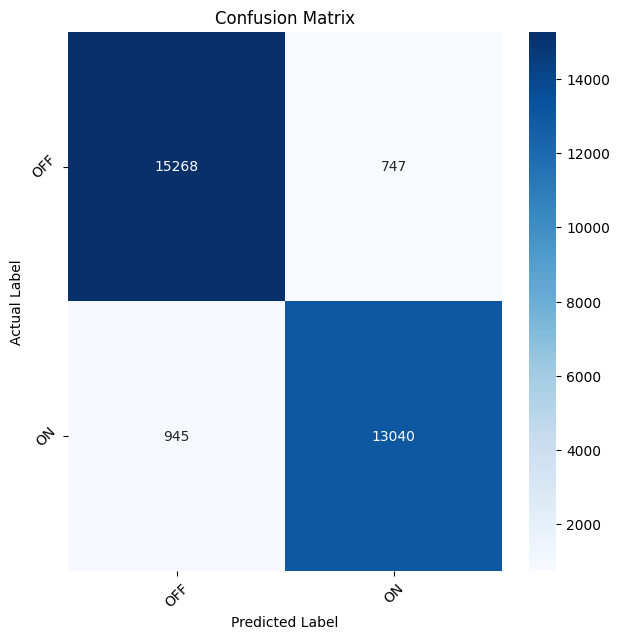

In [59]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the confusion matrix
cm = confusion_matrix(y_test, knn_ypred)

# Set the figure size
plt.rcParams["figure.figsize"] = (7, 7)

# Create a subplot
ax = plt.subplot()

# Create the heatmap using Seaborn
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")

# Set the title, labels, and rotation of tick labels
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.xticks(rotation=45)
plt.yticks(rotation=45)

# Set tick labels for both x and y axes
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

# Display the heatmap
plt.show()


In [63]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

# Replace 'X' with your actual feature data
# Replace 'V' with your actual target labels
# Example:
# X = your_feature_data
# V = your_target_labels

# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=True)

# Define the Gaussian Naive Bayes model
gnb = GaussianNB()

# Fit the model to the training data
gnb.fit(x_train, y_train)

# Make classification predictions on the test data
gnb_ypred = gnb.predict(x_test)


In [64]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

# Results
print("***Naive Bayes (GaussianNB)***")
print("Accuracy: {:.2f}%".format(accuracy_score(y_test, gnb_ypred) * 100))
print("F1 Score: {:.6f}".format(f1_score(y_test, gnb_ypred, average='macro')))
print("Precision: {:.6f}".format(precision_score(y_test, gnb_ypred)))
print("Recall: {:.6f}".format(recall_score(y_test, gnb_ypred)))


***Naive Bayes (GaussianNB)***
Accuracy: 75.75%
F1 Score: 0.755692
Precision: 0.746295
Recall: 0.723407


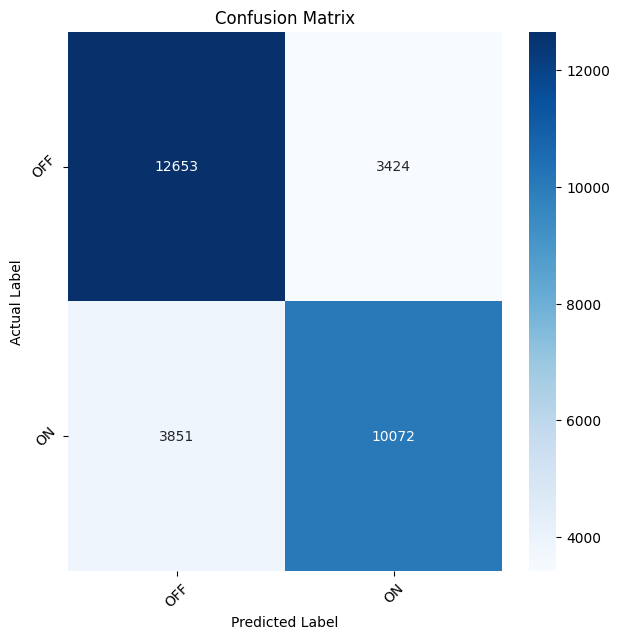

In [65]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the confusion matrix
cm = confusion_matrix(y_test, gnb_ypred)

# Set the figure size
plt.rcParams["figure.figsize"] = (7, 7)

# Create a subplot
ax = plt.subplot()

# Create the heatmap using Seaborn
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")

# Set the title, labels, and rotation of tick labels
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.xticks(rotation=45)
plt.yticks(rotation=45)

# Set tick labels for both x and y axes
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

# Display the heatmap
plt.show()


In [66]:
from sklearn.cluster import KMeans

# Create a K-Means model with 2 clusters (or the desired number of clusters)
kmeans = KMeans(n_clusters=2, random_state=42)

# Fit the K-Means model to your training data
kmeans.fit(x_train)

# Predict cluster labels for your test data
km_ypred = kmeans.predict(x_test)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [72]:
# Results
print("***K Means***")
print("Accuracy: {:.2f}%".format(accuracy_score(y_test, km_ypred) * 100))
print("F1 score: {:.6f}".format(f1_score(y_test, km_ypred, average='macro')))
print("Precision: ", precision_score(y_test, km_ypred))
print("Recall: ", recall_score(y_test, km_ypred))


***K Means***
Accuracy: 58.24%
F1 score: 0.581753
Precision:  0.5466907824222936
Recall:  0.5861524096818215


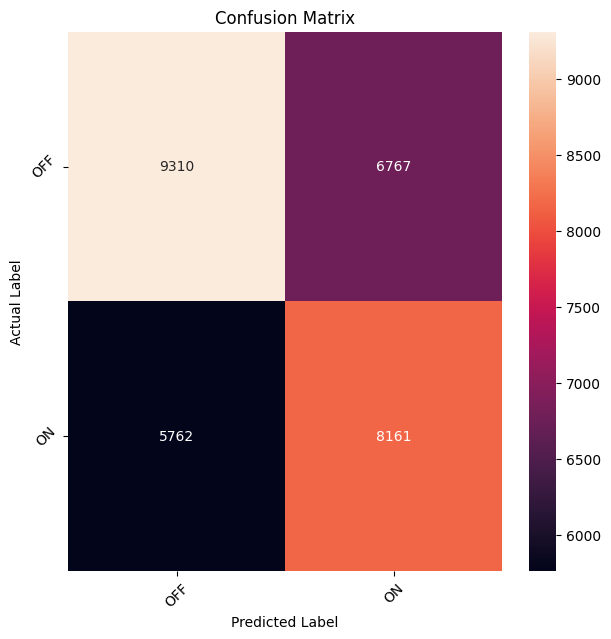

In [74]:
cm = confusion_matrix(y_test, km_ypred)
plt.rcParams["figure.figsize"] = (7, 7)
ax = plt.subplot()
fig = sns.heatmap(cm, annot=True, fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.xticks(rotation=45)
plt.yticks(rotation=45)
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)
plt.show()


In [75]:
from sklearn.tree import DecisionTreeClassifier

# Create a Decision Tree Classifier with specified parameters
clf = DecisionTreeClassifier(max_depth=3, min_samples_leaf=12)

# Fit the model to the training data
clf.fit(x_train, y_train)

# Predict using the trained model
dtc_ypred = clf.predict(x_test)


In [76]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

# Results
print("***Decision Tree Classifier***")
print("Accuracy: {:.2f}%".format(accuracy_score(y_test, dtc_ypred) * 100))
print("F1 Score: {:.6f}".format(f1_score(y_test, dtc_ypred, average='macro')))
print("Precision: {:.6f}".format(precision_score(y_test, dtc_ypred)))
print("Recall: {:.6f}".format(recall_score(y_test, dtc_ypred)))


***Decision Tree Classifier***
Accuracy: 82.83%
F1 Score: 0.818867
Precision: 0.974467
Recall: 0.646915


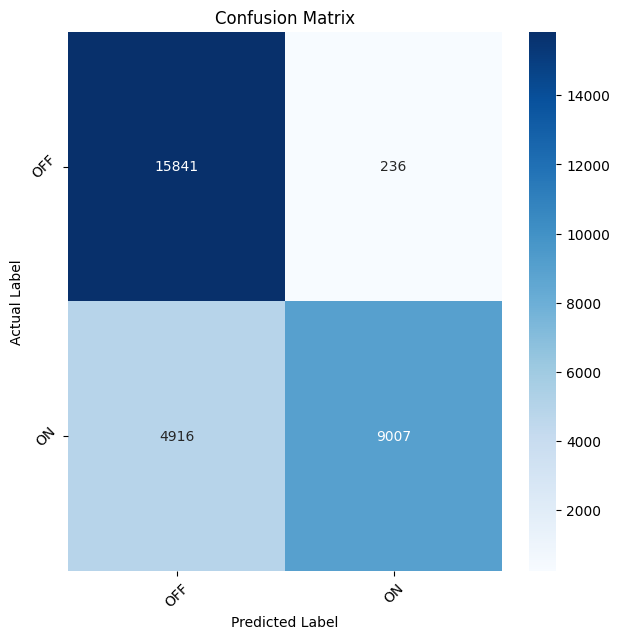

In [77]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the confusion matrix
cm = confusion_matrix(y_test, dtc_ypred)

# Set the figure size
plt.rcParams["figure.figsize"] = (7, 7)

# Create a subplot
ax = plt.subplot()

# Create the heatmap using Seaborn
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")

# Set the title, labels, and rotation of tick labels
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.xticks(rotation=45)
plt.yticks(rotation=45)

# Set tick labels for both x and y axes
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

# Display the heatmap
plt.show()


In [80]:
gb_clf = GradientBoostingClassifier(n_estimators=20, learning_rate=learning_rate, max_features=2, max_depth=2, random_state=0)
gb_clf.fit(x_train, y_train)
gb_clf_ypred = gb_clf.predict(x_test)  # Make predictions here


In [81]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split

# Scale the data
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Different learning rates to try
learning_rates = [0.85, 0.875, 0.9, 0.925, 0.95, 0.975, 1.0]

for learning_rate in learning_rates:
    gb_clf = GradientBoostingClassifier(n_estimators=20, learning_rate=learning_rate, max_features=2, max_depth=2, random_state=0)
    gb_clf.fit(x_train, y_train)

    # Print accuracy and classification report for each learning rate
    print("Learning Rate:", learning_rate)
    print("Accuracy Score (Training): {:.3f}".format(accuracy_score(y_train, gb_clf.predict(x_train))))
    print("Accuracy Score (Validation): {:.3f}".format(accuracy_score(y_test, gb_clf.predict(x_test))))
    print("Classification Report:")
    print(classification_report(y_test, gb_clf.predict(x_test)))
    print("-" * 50)


Learning Rate: 0.85
Accuracy Score (Training): 0.944
Accuracy Score (Validation): 0.945
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95     16077
           1       0.95      0.93      0.94     13923

    accuracy                           0.94     30000
   macro avg       0.95      0.94      0.94     30000
weighted avg       0.94      0.94      0.94     30000

--------------------------------------------------
Learning Rate: 0.875
Accuracy Score (Training): 0.938
Accuracy Score (Validation): 0.938
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.95      0.94     16077
           1       0.94      0.92      0.93     13923

    accuracy                           0.94     30000
   macro avg       0.94      0.94      0.94     30000
weighted avg       0.94      0.94      0.94     30000

--------------------------------------------------
Learning Rate: 0.9
Ac

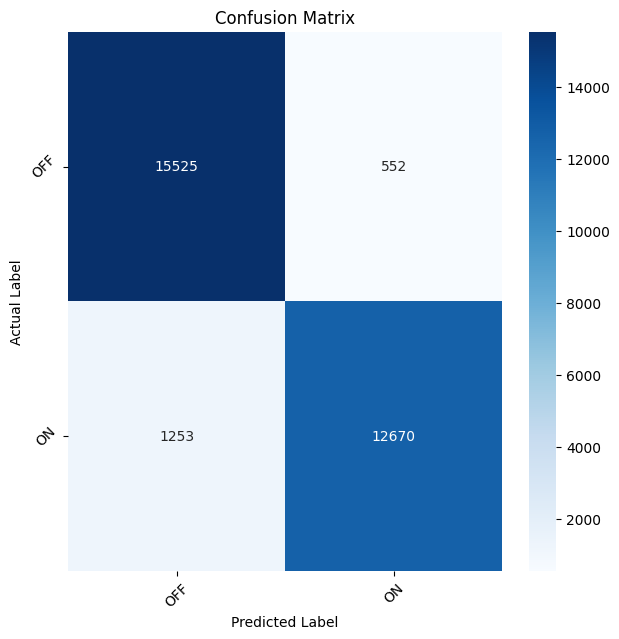

In [82]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the confusion matrix
cm = confusion_matrix(y_test, gb_clf_ypred)

# Set the figure size
plt.rcParams["figure.figsize"] = (7, 7)

# Create a subplot
ax = plt.subplot()

# Create the heatmap using Seaborn
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")

# Set the title, labels, and rotation of tick labels
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.xticks(rotation=45)
plt.yticks(rotation=45)

# Set tick labels for both x and y axes
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

# Display the heatmap
plt.show()
